Tercil 1 (33.33%): $139,685
Tercil 2 (66.67%): $190,000


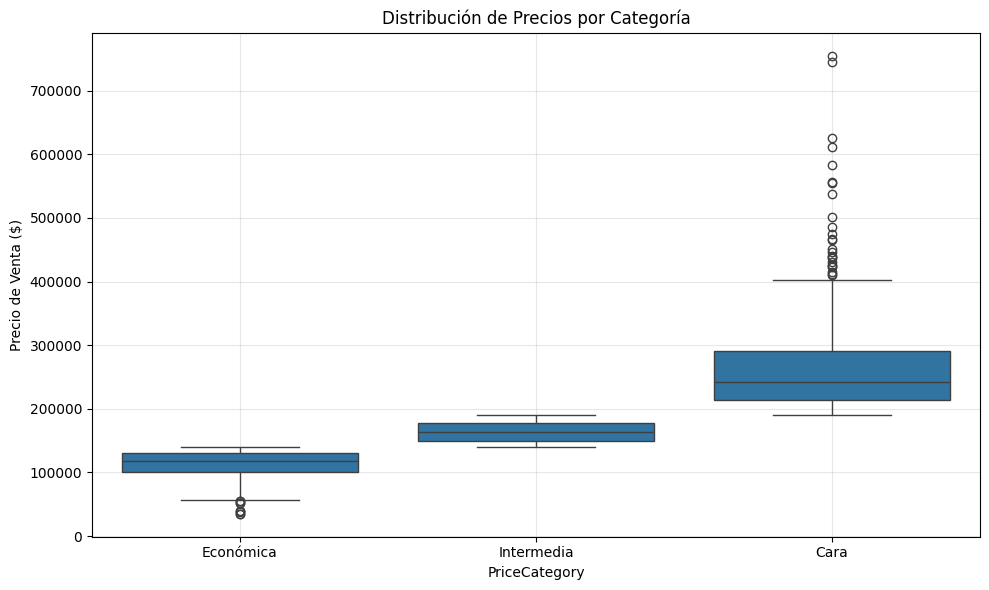

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler


# Cargar los datos
train_data = pd.read_csv('../../train.csv')

# Calcular los tercilos para SalePrice
tercil_1 = np.percentile(train_data['SalePrice'], 33.33)
tercil_2 = np.percentile(train_data['SalePrice'], 66.67)

print(f"Tercil 1 (33.33%): ${int(tercil_1):,}")
print(f"Tercil 2 (66.67%): ${int(tercil_2):,}")

# Crear la variable categórica PriceCategory
train_data['PriceCategory'] = pd.cut(
    train_data['SalePrice'],
    bins=[0, tercil_1, tercil_2, float('inf')],
    labels=['Económica', 'Intermedia', 'Cara'],
    include_lowest=True
)

# Verificar la distribución de las categorías
category_counts = train_data['PriceCategory'].value_counts().sort_index()

# Crear variables dummy (dicotómicas) a partir de PriceCategory
price_dummies = pd.get_dummies(train_data['PriceCategory'], dtype=int)

# Visualizar la distribución de precios por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='PriceCategory', y='SalePrice', data=train_data)
plt.title('Distribución de Precios por Categoría')
plt.ylabel('Precio de Venta ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:

# Cargar los datos
train_data = pd.read_csv('../../train.csv')

# Calcular los tercilos para SalePrice
tercil_1 = train_data['SalePrice'].quantile(1/3)
tercil_2 = train_data['SalePrice'].quantile(2/3)

# Crear la variable categórica PriceCategory
train_data['PriceCategory'] = pd.cut(
    train_data['SalePrice'],
    bins=[0, tercil_1, tercil_2, float('inf')],
    labels=['Económica', 'Intermedia', 'Cara'],
    include_lowest=True
)

# Crear variables dummy (dicotómicas) a partir de PriceCategory
price_dummies = pd.get_dummies(train_data['PriceCategory'], dtype=int)

price_dummies.head()

''' 

# 2. Crear la variable de respuesta categórica basada en los terciles del precio de venta
tercil_1 = df['SalePrice'].quantile(1/3)
tercil_2 = df['SalePrice'].quantile(2/3)

# Crear la categoría de precio
df['PriceCategory'] = pd.cut(
    df['SalePrice'], 
    bins=[0, tercil_1, tercil_2, float('inf')], 
    labels=['Económica', 'Intermedia', 'Cara']
)

print(f"Tercil 1 (33.33%): ${int(tercil_1):,}")
print(f"Tercil 2 (66.67%): ${int(tercil_2):,}")

'''


' \n\n# 2. Crear la variable de respuesta categórica basada en los terciles del precio de venta\ntercil_1 = df[\'SalePrice\'].quantile(1/3)\ntercil_2 = df[\'SalePrice\'].quantile(2/3)\n\n# Crear la categoría de precio\ndf[\'PriceCategory\'] = pd.cut(\n    df[\'SalePrice\'], \n    bins=[0, tercil_1, tercil_2, float(\'inf\')], \n    labels=[\'Económica\', \'Intermedia\', \'Cara\']\n)\n\nprint(f"Tercil 1 (33.33%): ${int(tercil_1):,}")\nprint(f"Tercil 2 (66.67%): ${int(tercil_2):,}")\n\n'

In [40]:
# Unir las variables dummy al dataset original
data_with_dummies = pd.concat([train_data, price_dummies], axis=1)
print("\nDataset con variables dummy (primeras 5 filas):")
data_with_dummies.head()


Dataset con variables dummy (primeras 5 filas):


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceCategory,Económica,Intermedia,Cara
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,Cara,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,Intermedia,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,Cara,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,Intermedia,0,1,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,Cara,0,0,1


In [41]:
# Seleccionar las características más importantes identificadas previamente
selected_features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath'        # Baños completos
]

X = data_with_dummies[selected_features].copy()

# Normalizar/estandarizar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)



## Caras

MODELO PARA PREDECIR CASAS 'CARAS'
Accuracy: 0.9201
Precision: 0.8824
Recall: 0.8633
F1-Score: 0.8727
AUROC: 0.9770
Matriz de confusión:
[[283  16]
 [ 19 120]]


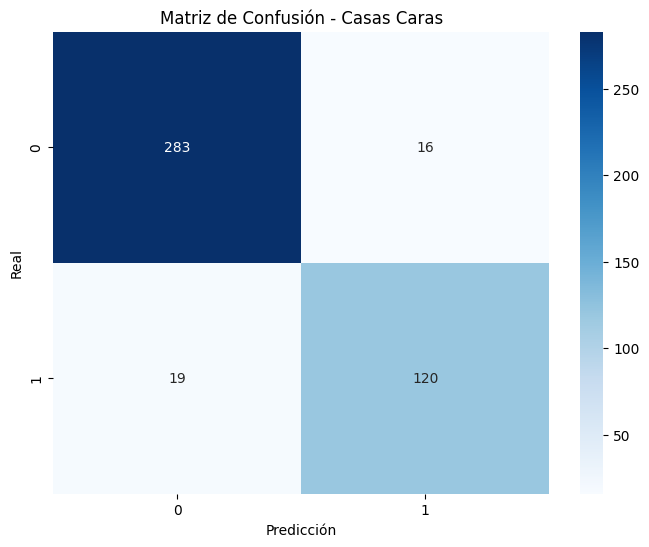

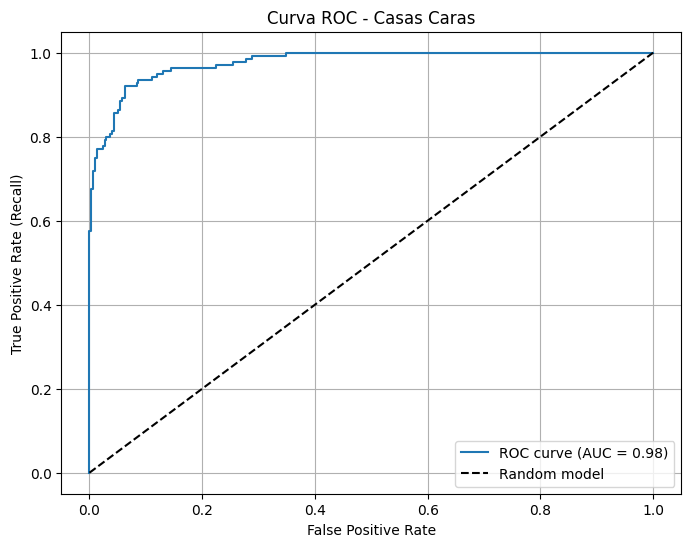

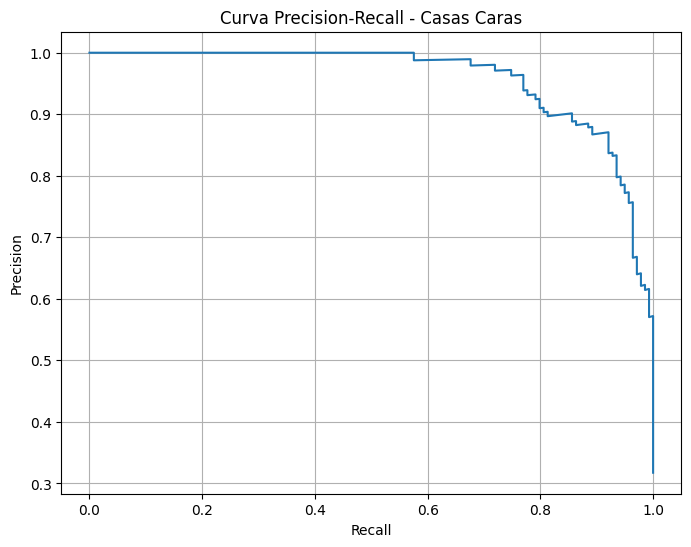

In [42]:
# ----- MODELO 1: PREDECIR SI UNA CASA ES "CARA" -----

# Variable objetivo: 1 si es cara, 0 si no
y_cara = price_dummies['Cara']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_cara, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo
log_reg_cara = LogisticRegression(solver='liblinear', random_state=42)
log_reg_cara.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg_cara.predict(X_test)
y_proba = log_reg_cara.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva

# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_proba)

print("MODELO PARA PREDECIR CASAS 'CARAS'")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")
print("Matriz de confusión:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Casas Caras")
plt.show()

# Visualizar curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auroc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - Casas Caras")
plt.legend()
plt.grid(True)
plt.show()

# Visualizar curva Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Casas Caras")
plt.grid(True)
plt.show()



## Económicas


MODELO PARA PREDECIR CASAS 'ECONÓMICAS'
Accuracy: 0.8790
Precision: 0.8000
Recall: 0.8774
F1-Score: 0.8369
AUROC: 0.9531
Matriz de confusión:
[[249  34]
 [ 19 136]]


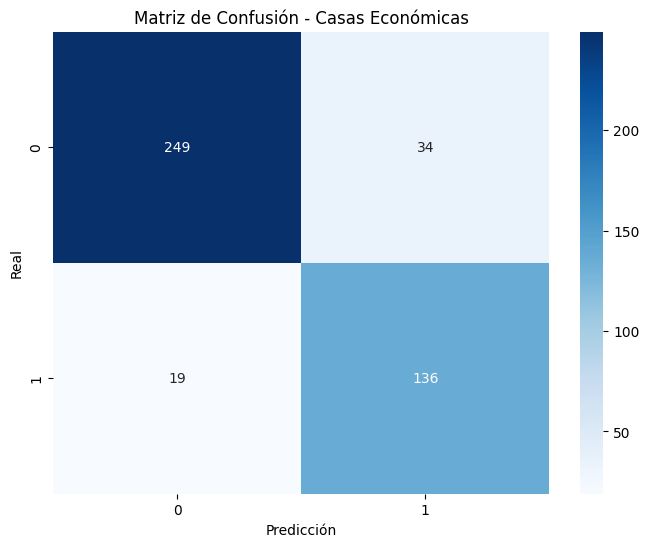

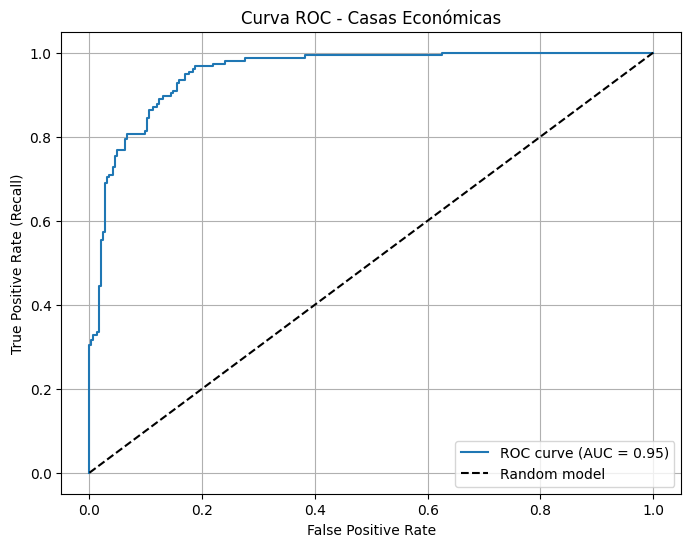

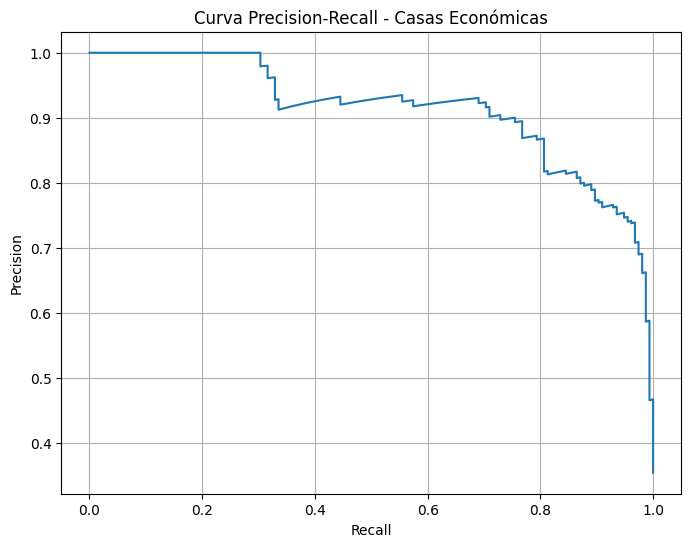

In [43]:
# ----- MODELO 2: PREDECIR SI UNA CASA ES "ECONÓMICA" -----

# Variable objetivo: 1 si es económica, 0 si no
y_economica = price_dummies['Económica']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_economica, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo
log_reg_economica = LogisticRegression(solver='liblinear', random_state=42)
log_reg_economica.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg_economica.predict(X_test)
y_proba = log_reg_economica.predict_proba(X_test)[:, 1]

# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_proba)

print("\nMODELO PARA PREDECIR CASAS 'ECONÓMICAS'")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")
print("Matriz de confusión:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Casas Económicas")
plt.show()

# Visualizar curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auroc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - Casas Económicas")
plt.legend()
plt.grid(True)
plt.show()

# Visualizar curva Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Casas Económicas")
plt.grid(True)
plt.show()



## Intermedias


MODELO PARA PREDECIR CASAS 'INTERMEDIAS'
Accuracy: 0.6530
Precision: 0.1000
Recall: 0.0069
F1-Score: 0.0130
AUROC: 0.6062
Matriz de confusión:
[[285   9]
 [143   1]]


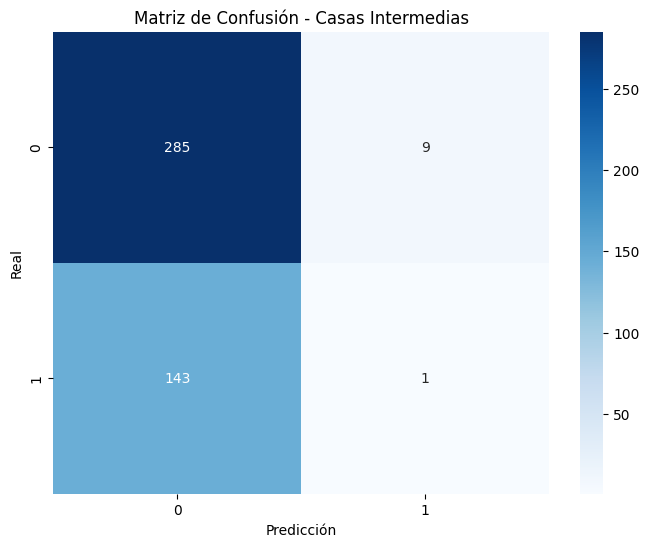

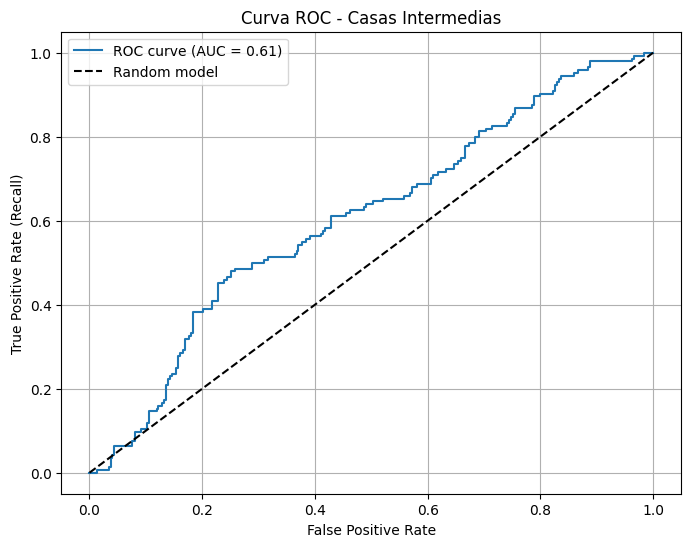

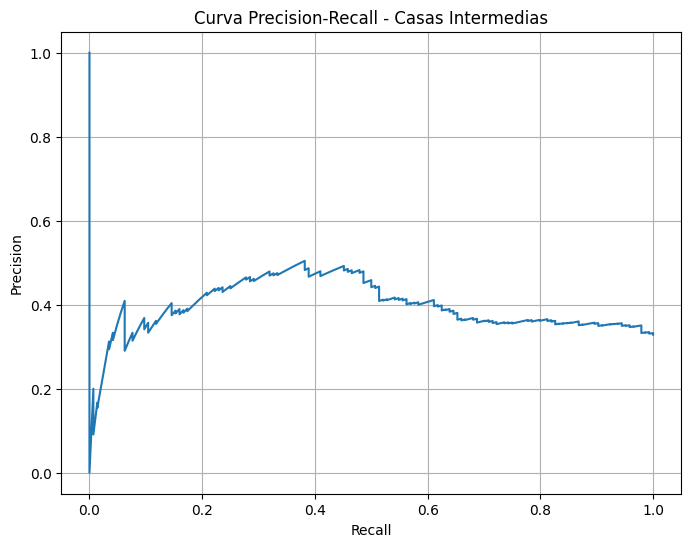

In [44]:
# ----- MODELO 3: PREDECIR SI UNA CASA ES "INTERMEDIA" -----

# Variable objetivo: 1 si es intermedia, 0 si no
y_intermedia = price_dummies['Intermedia']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_intermedia, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo
log_reg_intermedia = LogisticRegression(solver='liblinear', random_state=42)
log_reg_intermedia.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg_intermedia.predict(X_test)
y_proba = log_reg_intermedia.predict_proba(X_test)[:, 1]

# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_proba)

print("\nMODELO PARA PREDECIR CASAS 'INTERMEDIAS'")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")
print("Matriz de confusión:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Casas Intermedias")
plt.show()

# Visualizar curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auroc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - Casas Intermedias")
plt.legend()
plt.grid(True)
plt.show()

# Visualizar curva Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Casas Intermedias")
plt.grid(True)
plt.show()


